# K-Medoids

- K-medoids adalah varian jenis clustering non-hieracial yang digunakan untuk mengatasi beberapa kekurangan yang ada di K-Means
- K-means merupakan algoritma yang memanfaatkan perhitungan mean atau rata-rata, sehingga algoritma ini dipengaruhi oleh nilai outlier, yang menjadikan K-Means harus melakukan normalisasi data terlebih dahulu.
- Pada k-medoids cara kerja lebih sederhana dibandingkan dengan K-Means, dimana centroid akan dipilih secara acak namun dengan nilai yang terdapat pada salah satu baris dataset, bukan mencari atau menentukan nilai baru.

## Tahapan K-Medoids

1. Menentukan jumlah cluster yang diinginkan 
2. pilih secara acak medoid sebanyak k dari dataset yang tersedia
3. hitung masing-masing jarak terhadap medoids
4. melakukan iterasi medoids untuk mendapatkan cluster 
5. hitung total simgpangan. jika cluster tidak berubah dan julah jarak terdekat pada iterasi pertama lebih kecil dibandingkan iterasi kedua maka iterasi dihentikan
6. jika tidak terpenuhi ulangi langkah ke 3 sampai 5

## 1. Import Library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids

## 2. Membaca Dataset

In [4]:
gizi = pd.read_excel('dataset/dataset_gizi.xlsx')
gizi.head()

,No,Balita ke-,TB,BB
0,1,Balita 1,52.0,5.8
1,2,Balita 2,51.0,5.0
2,3,Balita 3,71.5,8.5
3,4,Balita 4,55.0,5.5
4,5,Balita 5,92.5,6.5


In [5]:
gizi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   No          10 non-null     int64  
 1   Balita ke-  10 non-null     object 
 2   TB          10 non-null     float64
 3   BB          10 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 452.0+ bytes


## 3. Memilih Kolom untuk Pemodelan

In [6]:
gizi_x = gizi.iloc[:,2:4]
gizi_x.head()

,TB,BB
0,52.0,5.8
1,51.0,5.0
2,71.5,8.5
3,55.0,5.5
4,92.5,6.5


## 4. Visualisasi sebaran Data 

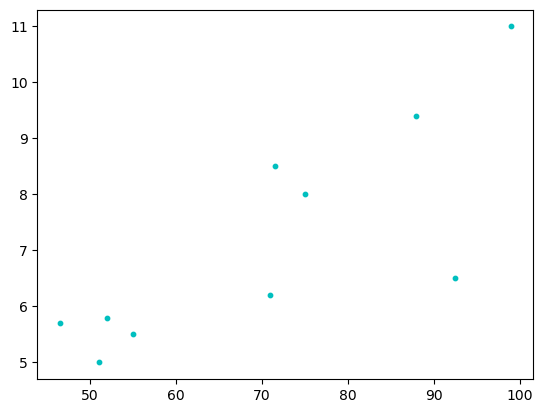

In [7]:
plt.scatter(gizi.TB, gizi.BB, s = 10, c = 'c', marker = 'o', alpha = 1)
plt.xlabel('TB')
plt.ylabel('BB')
plt.show()

In [2]:
# Mengubah dataframe menjadi array 
x_array = np.array(gizi_x)
print(x_array)

NameError: name 'np' is not defined

## 5. Pemodelan K-Medoids

In [9]:
KMedoids = KMedoids(n_clusters = 2, random_state= 0)

In [10]:
KMedoids.fit(x_array)

KMedoids(n_clusters=2, random_state=0)

### Hasil pemodelan cluster pusat

In [11]:
print(KMedoids.cluster_centers_)

[[52.   5.8]
 [75.   8. ]]


In [12]:
gizi['cluster'] = KMedoids.labels_

In [13]:
gizi.head()

,No,Balita ke-,TB,BB,cluster
0,1,Balita 1,52.0,5.8,0
1,2,Balita 2,51.0,5.0,0
2,3,Balita 3,71.5,8.5,1
3,4,Balita 4,55.0,5.5,0
4,5,Balita 5,92.5,6.5,1


## 6. Visualisasi Hasil Clustering

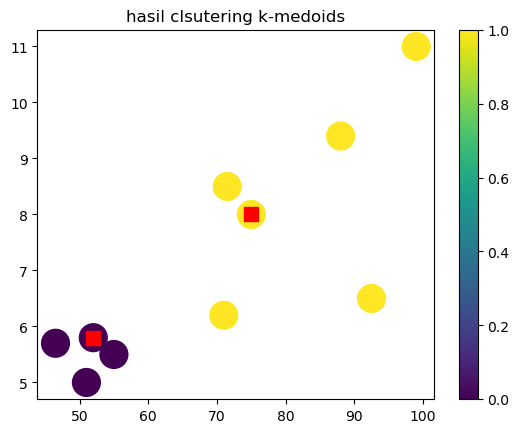

In [18]:
output = plt.scatter(x_array[:,0], x_array[:,1], s= 400, c = gizi.cluster, marker = 'o', alpha = 1)
centers = KMedoids.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c = 'red', s =100, alpha = 1, marker = 's')

plt.title('hasil clsutering k-medoids')
plt.colorbar(output)
plt.show()

## Kelebihan dan Kekurangan K-Medoids

### Kelebihan 

1. Tidak dipengaruhi oleh outlier
2. Mudah diimplementasikan dan dimengerti
3. Mudah ditafsirkan

#### Kekurangan

1. pengaturan cluster secara manual akan menyebabkan hasil yang tidak optimal